# Python
## Week 3:  More pandas and matplotlib

This tutorial was done under a project between  
[National Sun Yat-sen University](http://www.nsysu.edu.tw/?Lang=zh-tw) and [United Microelectronics Corporation](http://www.umc.com/chinese/).

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Jephian Lin</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

## 1. pandas:  DataFrame

Check the official [pandas tutorial](https://pandas.pydata.org/pandas-docs/stable/tutorials.html) and a simple version [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html) for more information.

In [2]:
import numpy as np
import pandas as pd

There are various ways to create a `DataFrame`.

Use a two-dimensional `ndarray`.

In [4]:
mtx = np.arange(15).reshape(3,5)
mtx

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [5]:
df = pd.DataFrame(mtx)
df

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14


Use a list of `Series`.  
Each `Series` becomes a row.

In [109]:
s = pd.Series(np.arange(5))
df = pd.DataFrame([s,s * 100,s > 2])
df

,0,1,2,3,4
0,0,1,2,3,4
1,0,100,200,300,400
2,0,0,0,1,1


Use a list of dictionaries.  
Each dictionary becomes a row.  
The keys of the dictionaries becomes the names of columns.

In [117]:
d1 = {'weight': 50, 'height': 150}
d2 = {'weight': 60, 'height': 160}
d3 = {'weight': 70, 'height': 170}
df = pd.DataFrame([d1,d2,d3])
df

,height,weight
0,150,50
1,160,60
2,170,70


Read from a `csv` file by `pd.read_csv(filename)`.

In [1]:
cat clean_data.csv ### Linux command for checking the content of a file

Name,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,Midterm1,Midterm2,Final
Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5,17,18,13
Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0,14,13,6
Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0,19,24,9
Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0,24,16,32


In [10]:
df = pd.read_csv('clean_data.csv')
df

,Name,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,Midterm1,Midterm2,Final
0,Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5,17,18,13
1,Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0,14,13,6
2,Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0,19,24,9
3,Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0,24,16,32


### DataFrame index and columns
If `df` is a `DataFrame`,  
`df.index` is the indices of the rows, while  
`df.columns` is the names of the columns.

In [11]:
df = pd.read_csv('clean_data.csv')
df

,Name,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,Midterm1,Midterm2,Final
0,Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5,17,18,13
1,Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0,14,13,6
2,Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0,19,24,9
3,Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0,24,16,32


In [12]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [13]:
df.columns

Index(['Name', 'HW1', 'HW2', 'HW3', 'HW4', 'HW5', 'HW6', 'HW7', 'HW8', 'HW9',
       'HW10', 'Midterm1', 'Midterm2', 'Final'],
      dtype='object')

You may use `.rename(dict)` to rename the indices or the columns.

In [14]:
df.rename({1:100})

,Name,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,Midterm1,Midterm2,Final
0,Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5,17,18,13
100,Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0,14,13,6
2,Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0,19,24,9
3,Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0,24,16,32


In [15]:
df.rename({'Final': 'Final Exam'},axis=1)

,Name,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,Midterm1,Midterm2,Final Exam
0,Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5,17,18,13
1,Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0,14,13,6
2,Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0,19,24,9
3,Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0,24,16,32


`df.set_index(column name)` pick a column and set it as the index (row names).

In [16]:
df.set_index('Name')

,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,Midterm1,Midterm2,Final
Name,,,,,,,,,,,,,
Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5,17,18,13
Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0,14,13,6
Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0,19,24,9
Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0,24,16,32


### DataFrame selection
Use `.iloc[row index, column index]` or `.loc[row names, column names]` to **select** an entry.  

In [30]:
df = pd.read_csv('clean_data.csv')
df = df.set_index('Name')
df

,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,Midterm1,Midterm2,Final
Name,,,,,,,,,,,,,
Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5,17,18,13
Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0,14,13,6
Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0,19,24,9
Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0,24,16,32


In [18]:
print(df.iloc[0,2])
print(df.loc['Amy','HW3'])

1.5
1.5


Slicing allows you to select a sub-`DataFrame`.

In [19]:
df.loc[:,'HW1':'HW10']

,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10
Name,,,,,,,,,,
Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5
Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0
Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0
Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0


By default,  
`df.[index name]` selects a column, and  
`df.loc[index name]` selects a row.

In [20]:
df['HW7']

Name
Amy       0.5
Bill      0.0
Chris     2.0
Daniel    2.0
Name: HW7, dtype: float64

In [21]:
df.loc['Chris']

HW1          2.0
HW2          2.0
HW3          1.0
HW4          1.0
HW5          2.0
HW6          2.0
HW7          2.0
HW8          1.0
HW9          0.0
HW10         0.0
Midterm1    19.0
Midterm2    24.0
Final        9.0
Name: Chris, dtype: float64

The same methods allow you to  
**create a new row or a new column**.

In [22]:
df.sum(axis=1) ### this computes the semester total

Name
Amy       58.5
Bill      46.0
Chris     65.0
Daniel    85.0
dtype: float64

In [26]:
df['total'] = df.sum(axis=1) ### this create a new column called total
df

,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,Midterm1,Midterm2,Final,total
Name,,,,,,,,,,,,,,
Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5,17,18,13,58.5
Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0,14,13,6,46.0
Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0,19,24,9,65.0
Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0,24,16,32,85.0


In [28]:
np.average(df,axis=0) ### this compute the average for each component

array([ 1.25 ,  1.125,  1.125,  1.625,  1.625,  1.625,  1.125,  1.5  ,
        0.75 ,  0.625, 18.5  , 17.75 , 15.   , 63.625])

In [31]:
df.loc['average'] = np.average(df,axis=0) ### this create a new row called average
df

,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,Midterm1,Midterm2,Final
Name,,,,,,,,,,,,,
Amy,2.00,0.500,1.500,1.500,1.500,1.500,0.500,1.0,0.00,0.500,17.0,18.00,13.0
Bill,1.00,0.000,1.000,2.000,2.000,2.000,0.000,2.0,2.00,1.000,14.0,13.00,6.0
Chris,2.00,2.000,1.000,1.000,2.000,2.000,2.000,1.0,0.00,0.000,19.0,24.00,9.0
Daniel,0.00,2.000,1.000,2.000,1.000,1.000,2.000,2.0,1.00,1.000,24.0,16.00,32.0
average,1.25,1.125,1.125,1.625,1.625,1.625,1.125,1.5,0.75,0.625,18.5,17.75,15.0


Slicing with boolean array.

In [27]:
df[df <= 13]

,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,Midterm1,Midterm2,Final
Name,,,,,,,,,,,,,
Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5,NaN,NaN,13.0
Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0,NaN,13.0,6.0
Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0,NaN,NaN,9.0
Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0,NaN,NaN,NaN


**String method**  
`.str` contains many functions related to strings.

Make every string upper case.

In [30]:
df.index.str.upper()

Index(['AMY', 'BILL', 'CHRIS', 'DANIEL'], dtype='object', name='Name')

Find all string that ends with something.

In [31]:
df.index.str.endswith('l')

array([False,  True, False,  True])

Find all string that starts with something.

In [32]:
df.columns.str.startswith('HW')

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False])

Slicing with string method

In [33]:
df.loc[ df.index.str.endswith('l') ]

,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,Midterm1,Midterm2,Final
Name,,,,,,,,,,,,,
Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0,14,13,6
Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0,24,16,32


In [35]:
df.loc[:, df.columns.str.startswith('HW') ]

,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10
Name,,,,,,,,,,
Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5
Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0
Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0
Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0


### Graphs of a DataFrame

A **line chart** is good for seeing the changes.  
`df.plot()` will plot the line chart for each column in `df`.

In [6]:
stock1 = 5 + 0.3 * np.arange(10) + np.random.randn(10)
stock2 = 10 - 0.1 * np.arange(10) + np.random.randn(10)
stock3 = 8 + 0.2 * np.arange(10) + 2 * np.random.randn(10)
df = pd.DataFrame({'stock1': stock1, 'stock2': stock2, 'stock3': stock3})
df

,stock1,stock2,stock3
0,4.994819,8.952085,7.167060
1,5.515096,10.225615,13.319081
2,6.455124,9.154339,11.210683
3,4.657893,8.040233,12.378481
4,5.883186,9.127027,9.240641
5,8.764341,7.790093,9.873392
6,8.929748,8.123018,9.187019
7,8.630700,8.967039,14.100790
8,9.007112,11.052948,8.006423
9,7.663316,8.565921,9.116546


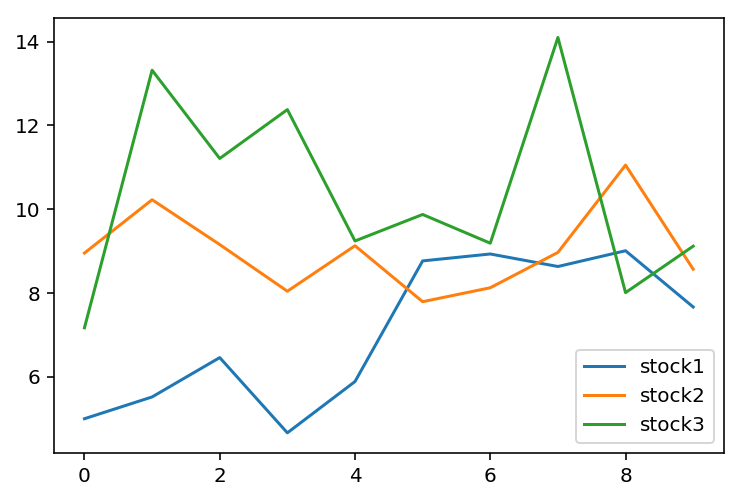

In [10]:
df.plot()

A **bar graph** is good for seeing the relations of different properties of an item.  
`df.plot.bar()` will produce a bar graph for each row.

In [2]:
weights = 50 + np.random.randint(-5,5,10)
heights = 2 * weights + 50 + np.random.randint(-5,5,10)
ages = np.random.randint(30,80,10)
df = pd.DataFrame({'weight': weights, 'height': heights, 'age': ages})
df

,weight,height,age
0,46,139,58
1,47,139,38
2,46,140,79
3,54,156,47
4,46,143,78
5,53,157,39
6,51,151,61
7,48,144,58
8,45,137,62
9,47,141,66


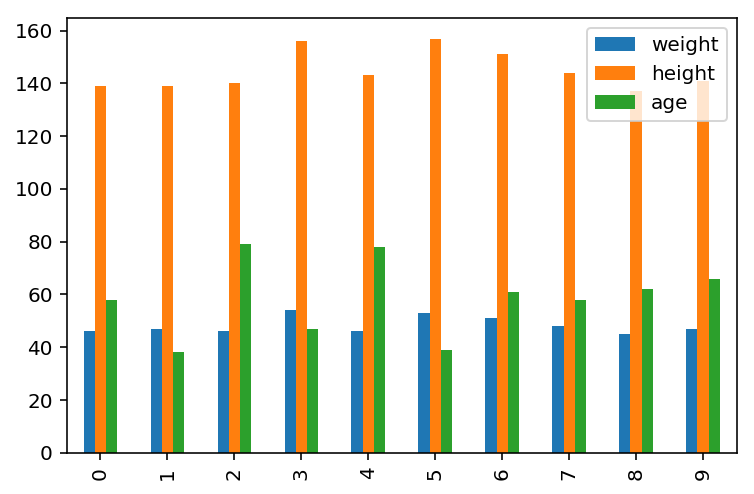

In [4]:
df.plot.bar()

A **scatter graph** is good for seeing the correlation between two properties.  
`df.plot.scatter(column name 1, column name 2)` will produce the scatter graph for these two columns.

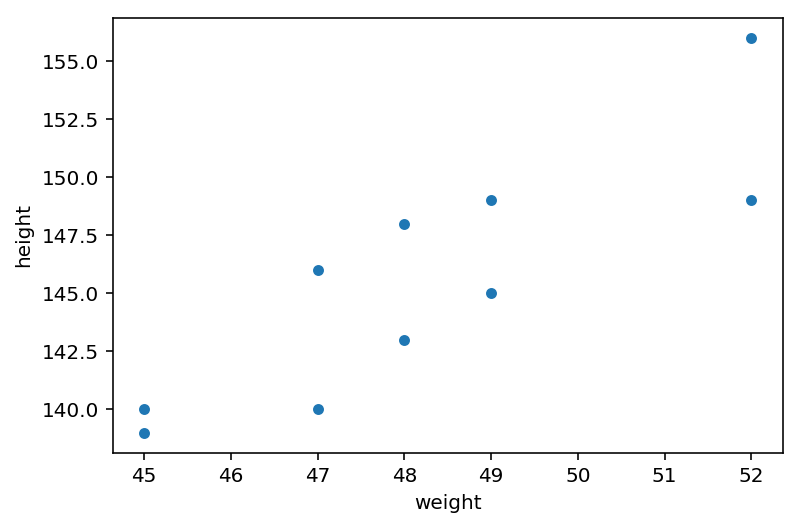

In [52]:
df.plot.scatter('weight','height')

A **histogram** is good for seeing the distribution (the frequency) of some data.  
`df.hist()` will draw the histogram for each column of `df`.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f67919a5d68>,
      dtype=object)

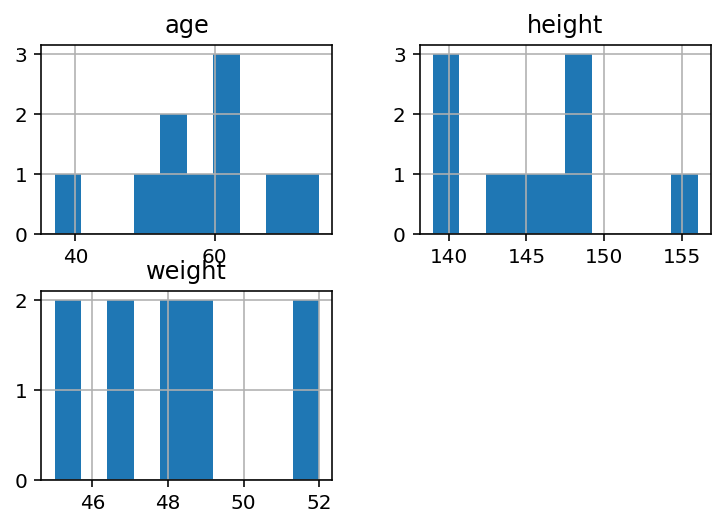

In [53]:
df.hist()

#### Exercise
Create a $3\times 4$ all-ones `DataFrame`.

In [ ]:
### Your answer here
df = pd.DataFrame(np.ones(???))
df

#### Exercise
Try the following code to  
guess the meaning of the `cumsum()` function  
and to refresh yourself about _axis_.

In [3]:
df = pd.DataFrame(np.random.randint(5,size=(3,4)))
df

,0,1,2,3
0,4,2,1,1
1,3,1,2,4
2,3,0,3,1


In [4]:
df.cumsum(axis=0)

,0,1,2,3
0,4,2,1,1
1,7,3,3,5
2,10,3,6,6


In [5]:
df.cumsum(axis=1)

,0,1,2,3
0,4,6,7,8
1,3,4,6,10
2,3,3,6,7


#### Exercise
`df` is a $3\times 4$ `DataFrame`.  
Change the names of the rows to `Day 1, ...,Day 3`  
and the names of the columns to `Price 1, ..., Price 4`.

In [38]:
df = pd.DataFrame(10 * np.random.randint(10,size=(3,4)))
### Your answer here

df

,0,1,2,3
0,90,70,20,80
1,60,10,50,40
2,90,20,20,10


#### Exercise
Using the renamed `df` you obtained previously,  
get the entry corresponding to `Price 2` and `Day 2`.

In [41]:
### Your answer here


#### Exercise
Using the renamed `df` you obtained previously,  
get the sub-DataFrame of `df` without the first column and the first row.

In [42]:
### Your answer here


#### Exercise
Using the renamed `df` you obtained previously,
get the row of `Day 2` in `df`. 

In [6]:
### Your answer here


#### Exercise
Using the renamed `df` you obtained previously,  
get the row of `Price 2` in `df`. 

In [6]:
### Your answer here


#### Exercise
Let `df` be the table from `clean_data.csv`  
indexed on the column of `'Name'`.  
Create a row called `max`  
that contains the maximum of each column.

In [10]:
df = pd.read_csv('clean_data.csv').set_index('Name')
### Your answer here

df

,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,Midterm1,Midterm2,Final
Name,,,,,,,,,,,,,
Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5,17,18,13
Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0,14,13,6
Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0,19,24,9
Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0,24,16,32


#### Exercise
Let `df` be the table from `clean_data.csv`  
indexed on the column of `'Name'`.  
Create a column called `HW total`  
that contains the total of all homework scores.

In [9]:
df = pd.read_csv('clean_data.csv').set_index('Name')
### Your answer here

df

,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,Midterm1,Midterm2,Final
Name,,,,,,,,,,,,,
Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5,17,18,13
Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0,14,13,6
Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0,19,24,9
Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0,24,16,32


#### Exercise
Do the previous exercise with the string method  
(if you didn't do it that way).

In [9]:
df = pd.read_csv('clean_data.csv').set_index('Name')
### Your answer here

df

,HW1,HW2,HW3,HW4,HW5,HW6,HW7,HW8,HW9,HW10,Midterm1,Midterm2,Final
Name,,,,,,,,,,,,,
Amy,2,0.5,1.5,1.5,1.5,1.5,0.5,1,0,0.5,17,18,13
Bill,1,0.0,1.0,2.0,2.0,2.0,0.0,2,2,1.0,14,13,6
Chris,2,2.0,1.0,1.0,2.0,2.0,2.0,1,0,0.0,19,24,9
Daniel,0,2.0,1.0,2.0,1.0,1.0,2.0,2,1,1.0,24,16,32


#### Exercise
Let `df` be the table from `clean_data.csv`  
indexed on the column of `'Name'`.  

Apply `cumsum()` on axis 1 to see how student earn scores by time.  
Then do `df.T` to get the transpose of `df`.  
Then plot this resulting DataFrame.  

Do everything in one line.

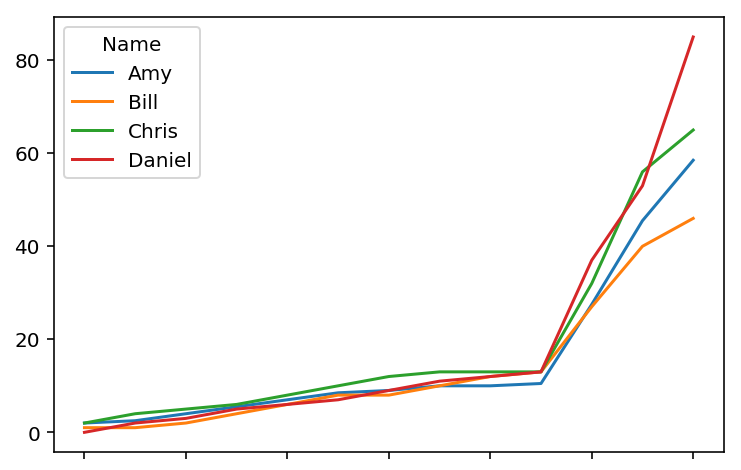

In [18]:
df = pd.read_csv('clean_data.csv').set_index('Name')
### Your answer here

df.cumsum(axis=1).T.plot()

#### Exercise
Let `df` be the table from `clean_data.csv`  
indexed on the column of `'Name'`.  

Select the columns of exams (the two midterms and the final).  
Then draw the bar graph for each students.

Do everything in one line.

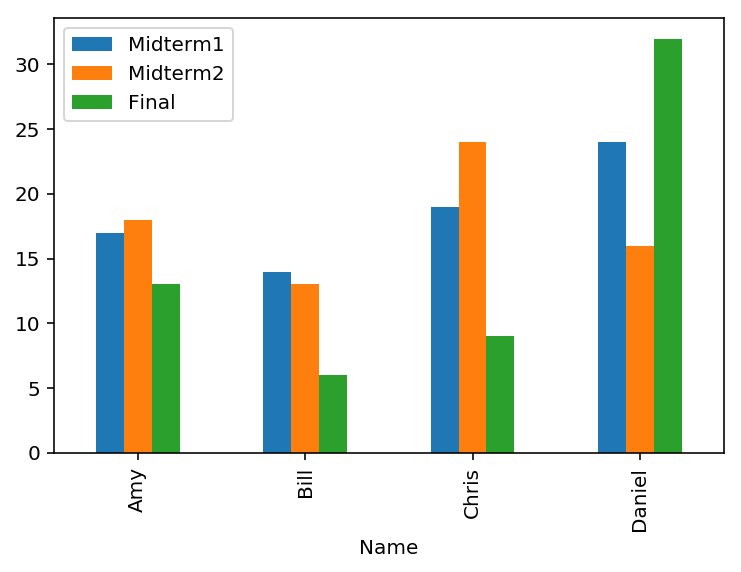

In [20]:
df = pd.read_csv('clean_data.csv').set_index('Name')
### Your answer here

df[['Midterm1','Midterm2','Final']].plot.bar()

#### Exercise
Let `df` be the table from `clean_data.csv`  
indexed on the column of `'Name'`.  

Draw the scatter graph by the columns of `Midterm1` and `Midterm2`.

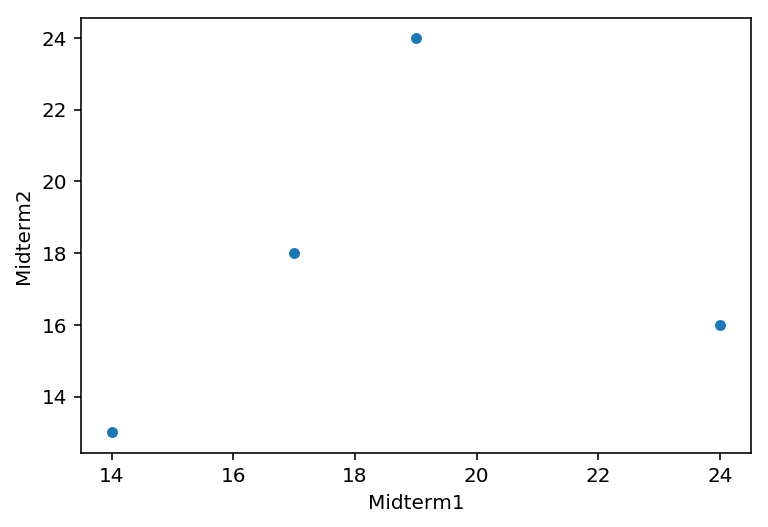

In [21]:
df = pd.read_csv('clean_data.csv').set_index('Name')
### Your answer here

df.plot.scatter('Midterm1','Midterm2')

## 2. matplotlib basics

[matplotlib](https://matplotlib.org/) is a plotting library.  
Using `matplotlib`, one may draw any graph from scratch.  
Indeed, many programs, including pandas, call matplotlib to produce pictures.  

But many statistical figures has routined work to do,  
so `matplotlib.pyplot` provides several convenient commands for drawing particular graphs  
such as the histogram, the bar graph, and so on.

See the official [matplotlib tutorial](https://matplotlib.org/tutorials/index.html) for more information.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Most of `matplotlib.pyplot` commands for statistics  
takes **numpy data** as the input.

`plt.plot(x,y)` connects the points in `zip(x,y)` by segments.

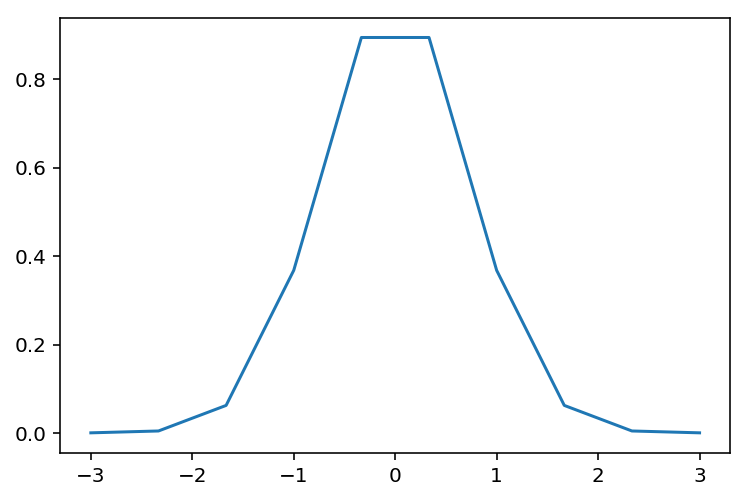

In [9]:
x = np.linspace(-3,3,10)
y = np.exp(-x**2)
plt.plot(x,y)

Make it smoother.

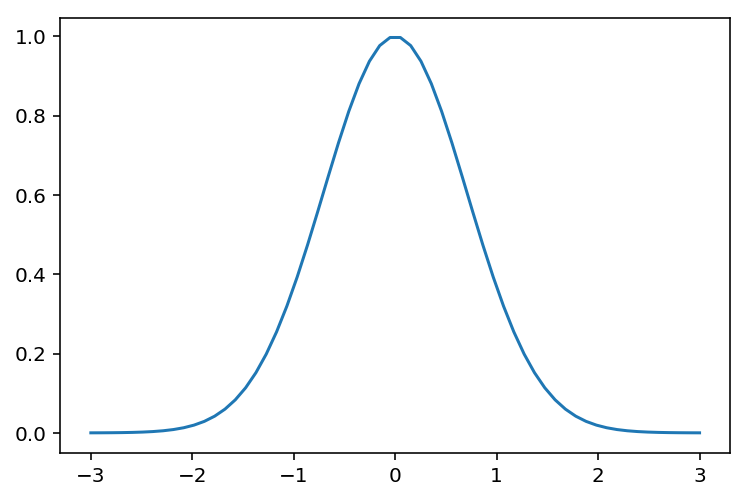

In [11]:
x = np.linspace(-3,3,60)
y = np.exp(-x**2)
plt.plot(x,y)

`plt.scatter(x,y)` plots the points in `zip(x,y)`  
but no segments in between.

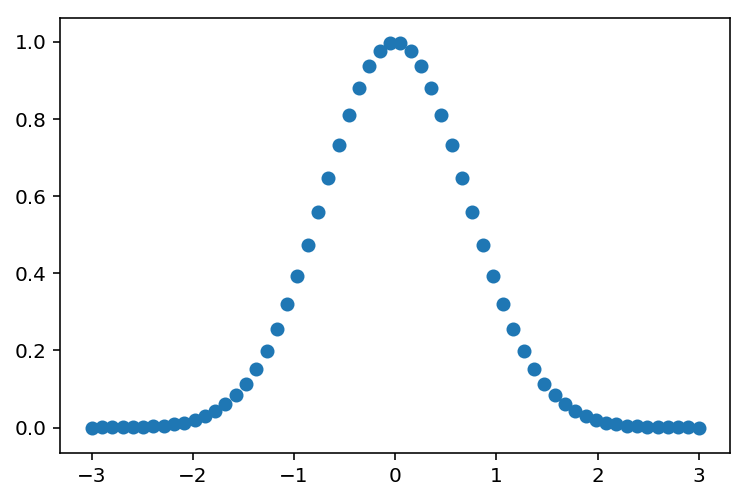

In [12]:
plt.scatter(x,y)

`plt.hist(vals)` separates data in `vals` in to `bin` categories

(array([ 1.,  0.,  0.,  1.,  0.,  1.,  2.,  2.,  1.,  2.,  4.,  6.,  9.,
         7., 16., 14., 18., 22., 17., 30., 33., 43., 45., 39., 36., 52.,
        52., 56., 43., 51., 65., 51., 46., 26., 35., 35., 32., 17., 23.,
        13., 14.,  7.,  8.,  6.,  5.,  7.,  2.,  3.,  1.,  1.]),
 array([-3.61294833, -3.48198362, -3.35101891, -3.2200542 , -3.08908949,
        -2.95812479, -2.82716008, -2.69619537, -2.56523066, -2.43426595,
        -2.30330124, -2.17233654, -2.04137183, -1.91040712, -1.77944241,
        -1.6484777 , -1.51751299, -1.38654829, -1.25558358, -1.12461887,
        -0.99365416, -0.86268945, -0.73172474, -0.60076003, -0.46979533,
        -0.33883062, -0.20786591, -0.0769012 ,  0.05406351,  0.18502822,
         0.31599292,  0.44695763,  0.57792234,  0.70888705,  0.83985176,
         0.97081647,  1.10178117,  1.23274588,  1.36371059,  1.4946753 ,
         1.62564001,  1.75660472,  1.88756942,  2.01853413,  2.14949884,
         2.28046355,  2.41142826,  2.54239297,  2.67335768,

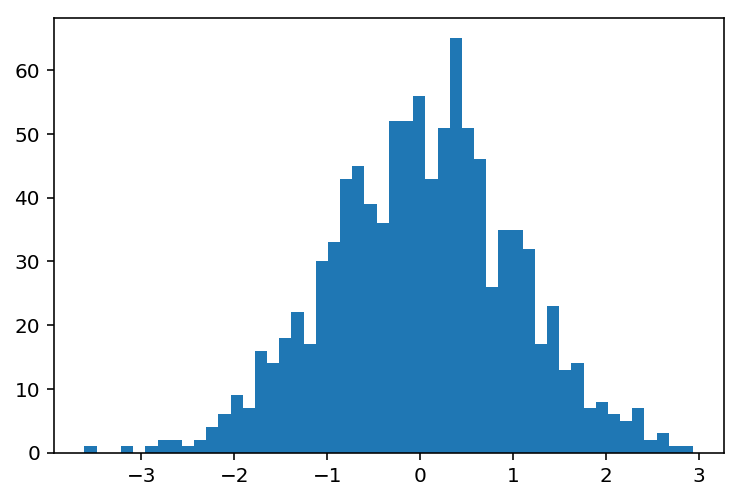

In [18]:
vals = np.random.randn(1000)
plt.hist(vals,bins=50)

`plt.bar(x,y)` draw a bar graph that has  
`x.size` bars at positions given by `x` and with heights given by `y`.

<Container object of 5 artists>

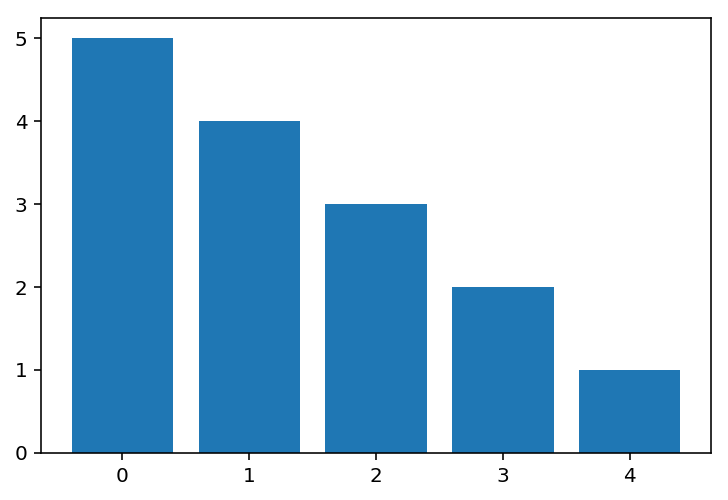

In [22]:
x = np.arange(5)
y = 5 - x
plt.bar(x,y)

In [26]:
import sklearn.datasets
iris = sklearn.datasets.load_iris()

In [29]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [31]:
data = iris.data

In [33]:
first_kind = data[ iris.target== 0 ]

(array([ 4.,  1.,  6.,  5., 12.,  8.,  4.,  5.,  2.,  3.]),
 array([4.3 , 4.45, 4.6 , 4.75, 4.9 , 5.05, 5.2 , 5.35, 5.5 , 5.65, 5.8 ]),
 <a list of 10 Patch objects>)

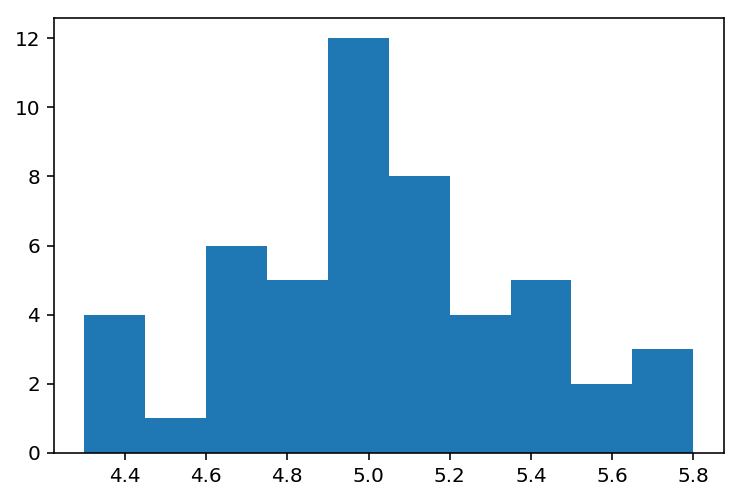

In [38]:
plt.hist(first_kind[:,0])

In [35]:
data.size

600

lots of exercises

## 3. more matplotlib
As mentioned, `matplotlib` allows you to draw almost everything.  
Knowing more fundamental ideas in `matplotlib`  
provides you more freedom to toggle with every details and create various pictures.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Use `plt.figure()` to create a **figure** object.  
A figure object is the whole canvas for a picture.

To draw something, you have to `add_axes()` first.

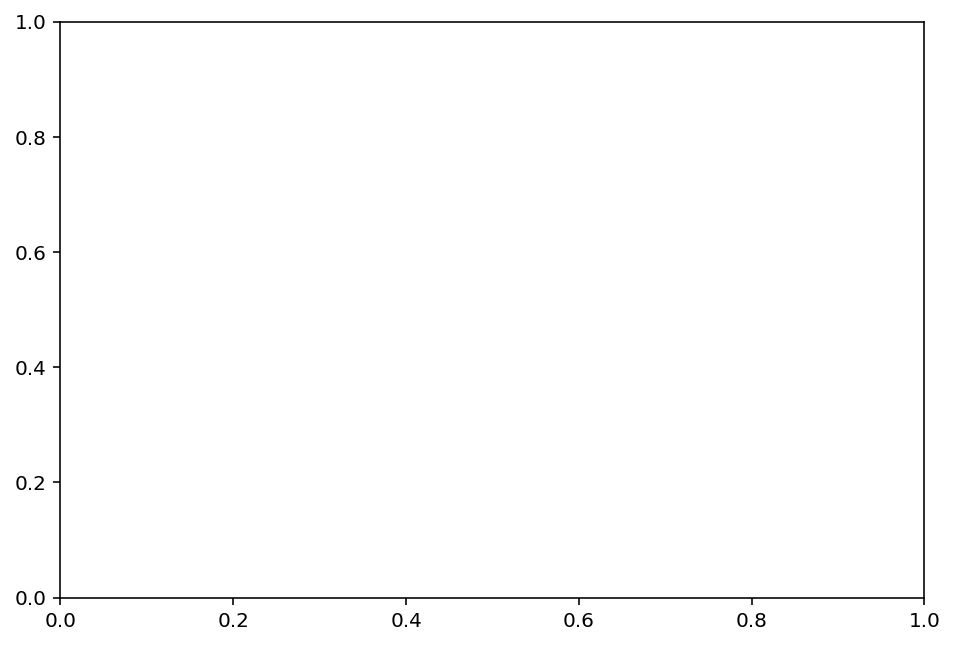

In [10]:
fig = plt.figure()
fig.add_axes([0,0,1,1])

`add_axes()` takes a list `[left, bottom, width, height]` as its input.  
Each parameters in the list is a **proportion** to the figure width and height.

Each coordinate system (x-axis and y-axis, usually) is called an **Axes** object.

Text(0.5,1,'ax3')

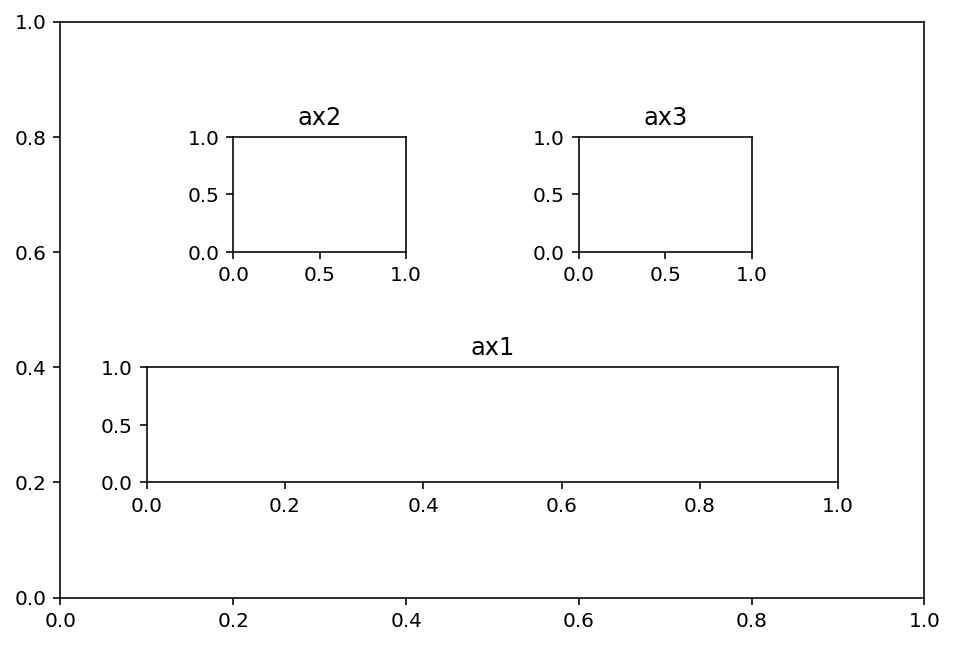

In [13]:
fig = plt.figure()
fig.add_axes([0,0,1,1])

ax1 = fig.add_axes([0.1,0.2,0.8,0.2]) ### If you store the Axes object
ax1.set_title('ax1') ### then you can do something to it.

ax2 = fig.add_axes([0.2,0.6,0.2,0.2])
ax2.set_title('ax2')

ax3 = fig.add_axes([0.6,0.6,0.2,0.2])
ax3.set_title('ax3')

Each pictures generated previously are drawn on an **Axes** object.  
(For 2D graphs, each `Axes` object has its two **Axis**.)

When `ax` is an Axes object,  
you may use `ax.plot()` or so to draw on the Axes object.  

`plt.plot()` will plot on the last Axes object.

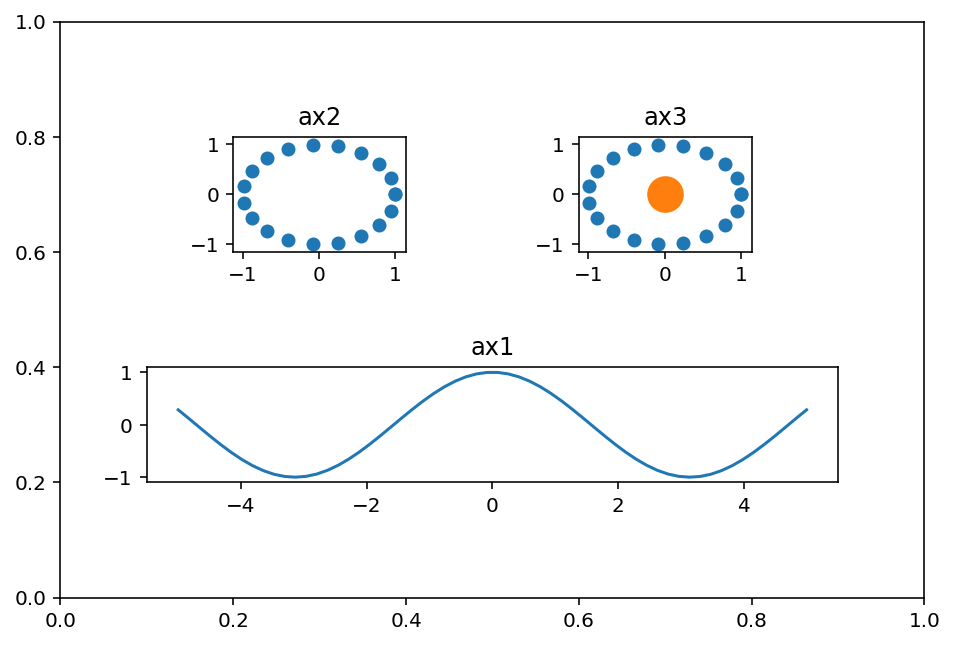

In [79]:
fig = plt.figure()
fig.add_axes([0,0,1,1])

ax1 = fig.add_axes([0.1,0.2,0.8,0.2]) ### If you store the Axes object
ax1.set_title('ax1') ### then you can do something to it.
x = np.linspace(-5,5,60)
y = np.cos(x)
ax1.plot(x,y) 

ax2 = fig.add_axes([0.2,0.6,0.2,0.2])
ax2.set_title('ax2')
t = np.linspace(0,2*np.pi,20)
x = np.cos(t)
y = np.sin(t)
ax2.scatter(x,y)

ax3 = fig.add_axes([0.6,0.6,0.2,0.2])
ax3.set_title('ax3')
ax3.scatter(x,y)

plt.scatter([0],[0],s=[300]) ### s is the size

### `subplots()` and `subplot()`

`fig.subplots(m,n)` creates `m * n` Axes objects  
and return them as a list `axs`  
where `axs[i,j]` is the Axes on the `i`-th row and the `j`-th column.

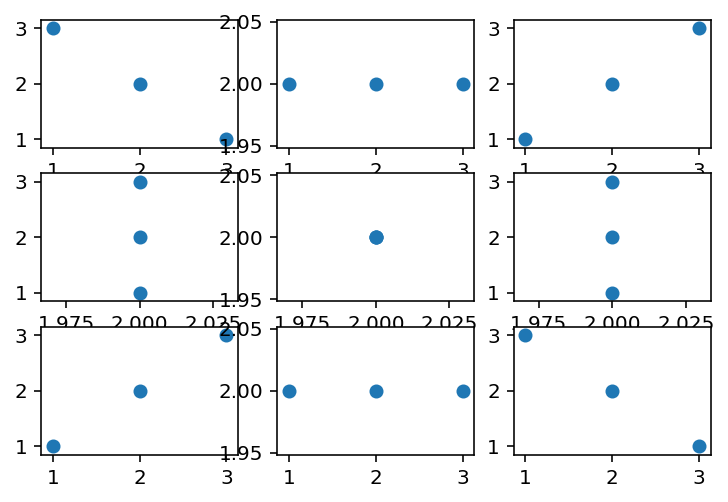

In [46]:
fig = plt.figure()
axs = fig.subplots(3,3)
### the previous two lines can be combined as 
### fig, axs = plt.subplots(3,3)

x = [None, None, None]
x[0] = np.array([1,2,3])
x[1] = np.array([2,2,2])
x[2] = np.array([3,2,1])

for i in range(3):
    for j in range(3):
        axs[i,j].scatter(x[i],x[2-j])

Alternatively, you may create **only** one subplot  
by `plt.subplot(m,n,k)`.  
This function will create an Axes object at the `k`-th position  
among the `m * n` grid.

The index of the positions is from `1` to `m * n`,  
increasing by the row-major order.

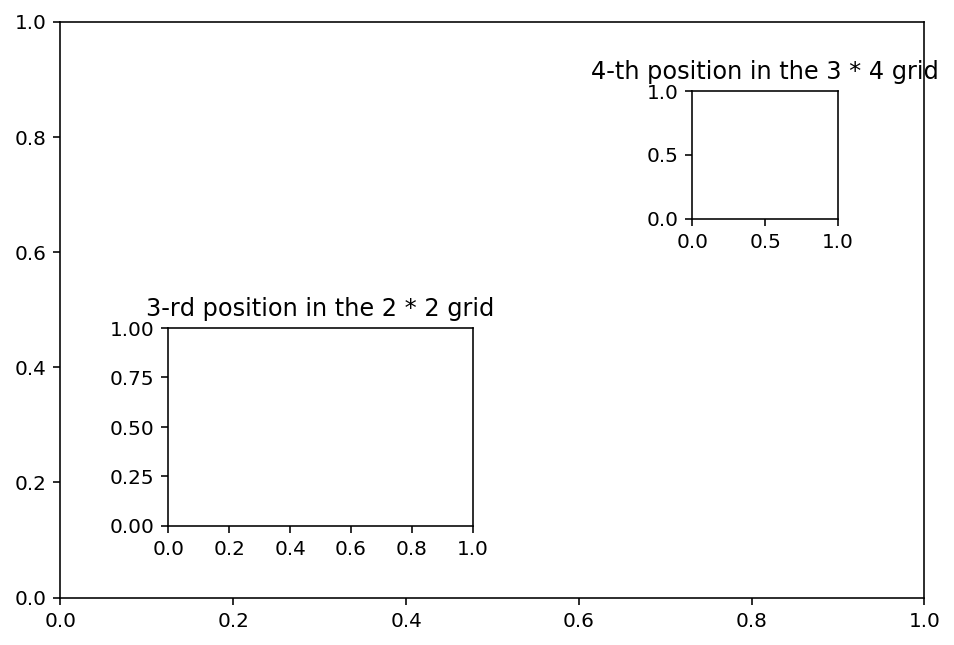

In [55]:
fig = plt.figure()
ax1 = plt.subplot(3,4,4)
ax1.set_title('4-th position in the 3 * 4 grid')

ax2 = plt.subplot(2,2,3)
ax2.set_title('3-rd position in the 2 * 2 grid')

main_ax = fig.add_axes([0,0,1,1])
main_ax.set_zorder(-1) ### zorder put the main_ax at the back

### Selecting Axes objects

`fig.axes` returns a list of all Axes objects on `fig`.  
You may use it to select the desired Axes object.

[<matplotlib.axes._subplots.AxesSubplot object at 0x7f029971d940>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f02996f19b0>]


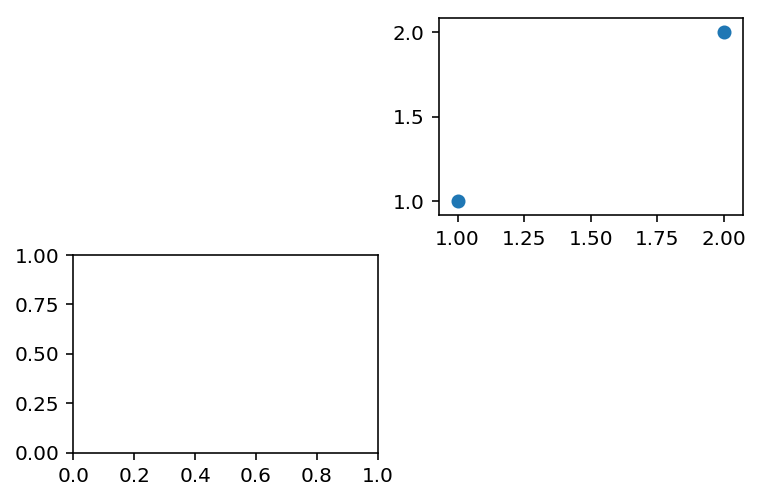

In [57]:
fig = plt.figure()
plt.subplot(2,2,2)
plt.subplot(2,2,3)
axs = fig.axes
print(axs)
axs[0].scatter([1,2],[1,2])

`matplotlib` keep track of the **current Figure** and the **current Axes**.  
Commands like `plt.plot()` without specifying the Figure and the Axes  
will be drawn on the current Figure nad the current Axes.  

Use `plt.gcf()` and `plt.gca()` to get them.

<Container object of 3 artists>

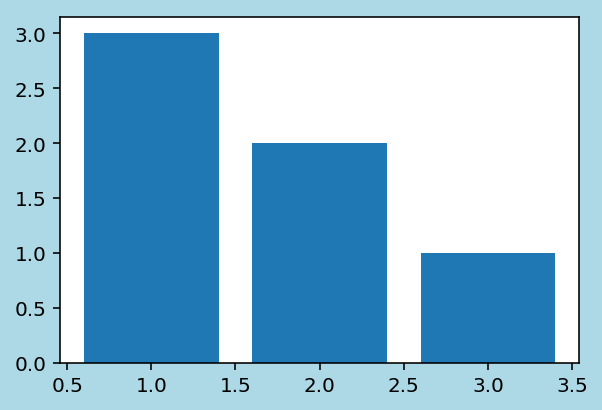

In [72]:
plt.figure()
fig = plt.gcf()
fig.patch.set_color('lightblue') 

fig.add_axes([0.2,0.2,0.6,0.6])
ax = plt.gca()
ax.bar([3,2,1],[1,2,3])

### Setting the Axes object

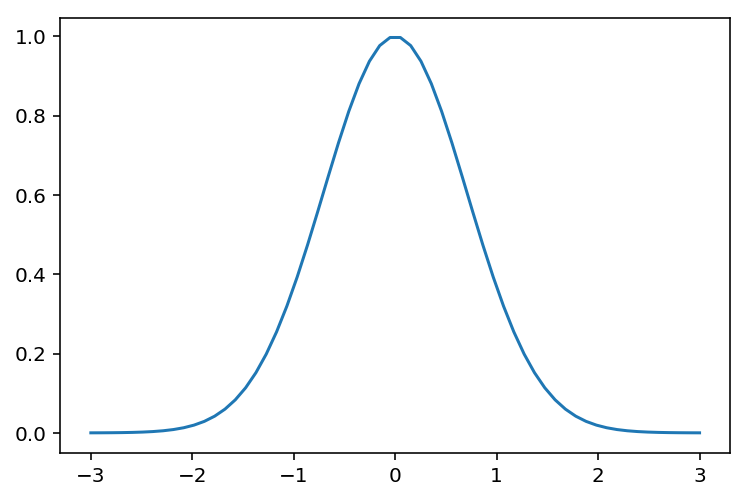

In [45]:
x = np.linspace(-3,3,60)
y = np.exp(-x**2)
plt.plot(x,y)

[Text(0,0,'0'), Text(0,0,'4'), Text(0,0,'8')]

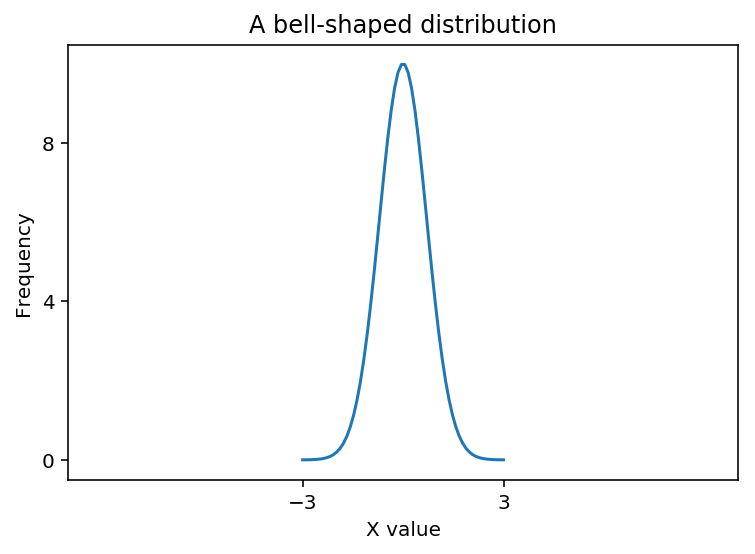

In [56]:
x = np.linspace(-3,3,60)
y = np.exp(-x**2)
plt.plot(x,y)

ax = plt.gca()
ax.set_title('A bell-shaped distribution')
ax.set_xlabel('X value')
ax.set_ylabel('Frequency')
ax.set_xlim(-10,10)
ax.set_xticks([-3,3])
ax.set_yticks([0,0.4,0.8])
ax.set_yticklabels([0,4,8])

A good figure should deliver the information efficiently.

pandas sort by values or index or column  
clean up the raw data

In [27]:
df = pd.read_csv('scores.csv',skiprows=2)

In [28]:
df

,Name,Id,Email,grade: 2018FMath555/HW1,grade: 2018FMath555/HW2,grade: 2018FMath555/HW3,grade: 2018FMath555/HW4,grade: 2018FMath555/HW5,grade: 2018FMath555/HW6,grade: 2018FMath555/HW7,...,comments: 2018FMath555/HW5,comments: 2018FMath555/HW6,comments: 2018FMath555/HW7,comments: 2018FMath555/HW8,comments: 2018FMath555/HW9,comments: 2018FMath555/HW10,comments: 2018FMath555/HW11,comments: 2018FMath555/Midterm1,comments: 2018FMath555/Midterm2,comments: 2018FMath555/Final
0,Amy,4561896523723189,amy@ggmail.com,2,0.5,1.5,1.5,1.5,1.5,0.5,...,do it again,good,Well-done,keep going,ok,do it again,good,Well-done,keep going,ok
1,Bill,6548915265745674,bill@ggmail.com,1,0.0,1.0,2.0,2.0,2.0,0.0,...,m…,nice,can be better,work harder!,well…,m…,nice,can be better,work harder!,well…
2,Chris,3206996875312559,chris@ggmail.com,2,2.0,1.0,1.0,2.0,2.0,2.0,...,excellent,great,try again,no comment,uh…,excellent,great,try again,no comment,uh…
3,Daniel,7913653789156327,daniel@ggmail.com,0,2.0,1.0,2.0,1.0,1.0,2.0,...,nice work,cool,nice,so far so good,None,nice work,cool,nice,so far so good,None
